In [3]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [4]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
print('Training Images:{}'.format(X_train.shape))
print('Testing Images:{}'.format(X_test.shape))

Training Images:(50000, 32, 32, 3)
Testing Images:(10000, 32, 32, 3)


In [6]:
print(X_train[0].shape)

(32, 32, 3)


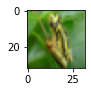

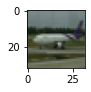

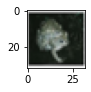

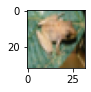

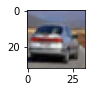

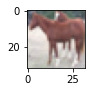

In [7]:
for i in range(232,238):
  plt.subplot(120+1 + i)
  img = X_train[i]
  plt.imshow(img)
  plt.show()

In [8]:
X_train = X_train.reshape(X_train.shape[0], 32,32,3)
X_test= X_test.reshape(X_test.shape[0], 32,32,3)
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

X_train /= 255
X_test /= 255
n_classes = 10

print("Shape before one hot encoding:", Y_train.shape)
Y_train= np_utils.to_categorical(Y_train, n_classes)
Y_test= np_utils.to_categorical(Y_test, n_classes)
print("Shape after one hot encoding:", Y_train.shape)


Shape before one hot encoding: (50000, 1)
Shape after one hot encoding: (50000, 10)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
model = Sequential()
#convolutional layers
model.add( Conv2D (50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))
model.add( Conv2D (75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D (pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10, activation='softmax'))
#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#training the model
model.fit(X_train, Y_train, batch_size=128, epochs= 20, validation_data = (X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 395s 1s/step - loss: 1.5375 - accuracy: 0.4359 - val_loss: 1.1886 - val_accuracy: 0.5820
Epoch 2/20
391/391 [==============================] - 390s 997ms/step - loss: 1.1043 - accuracy: 0.6084 - val_loss: 0.9661 - val_accuracy: 0.6599
Epoch 3/20
391/391 [==============================] - 388s 992ms/step - loss: 0.9461 - accuracy: 0.6673 - val_loss: 0.8839 - val_accuracy: 0.6934
Epoch 4/20
391/391 [==============================] - 390s 997ms/step - loss: 0.8232 - accuracy: 0.7129 - val_loss: 0.8464 - val_accuracy: 0.7040
Epoch 5/20
391/391 [==============================] - 388s 992ms/step - loss: 0.7221 - accuracy: 0.7458 - val_loss: 0.8340 - val_accuracy: 0.7073
Epoch 6/20
391/391 [==============================] - 388s 992ms/step - loss: 0.6307 - accuracy: 0.7766 - val_loss: 0.8365 - val_accuracy: 0.7121
Epoch 7/20
391/391 [==============================] - 387s 990ms/step - loss: 0.5540 - accuracy: 0.8060 - val_loss: 0.8366 - va

In [10]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']
#zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes,names))

#generate batch of 9 images to predict
batch= X_test[100:109]
labels= np.argmax(Y_test[100:109],axis=-1)

#make predictions
predictions= model.predict(batch, verbose=1)


1/1 [==============================] - 0s 129ms/step


In [11]:
print(predictions)

[[2.50042183e-04 8.64995891e-05 7.16154091e-03 6.92310706e-02
  3.32767338e-01 2.51593143e-01 2.93246619e-02 3.08898240e-01
  3.27508576e-04 3.59980913e-04]
 [1.76695967e-03 3.30239040e-04 1.36753529e-01 3.16138327e-01
  3.38970214e-01 5.85411787e-02 1.25063211e-01 2.05063056e-02
  1.28767279e-03 6.42278348e-04]
 [3.48884432e-09 4.64872372e-08 5.78200229e-07 5.75451122e-06
  1.80447002e-09 7.50202380e-05 9.99914646e-01 3.97191343e-06
  6.72891021e-10 1.68789729e-08]
 [2.70004733e-07 4.14146264e-08 4.88559590e-06 9.92344797e-01
  1.40387099e-03 4.30938712e-07 6.23635063e-03 3.48306024e-08
  7.84387794e-06 1.47467017e-06]
 [5.64438940e-10 9.99992371e-01 8.14712933e-19 1.37438582e-18
  7.43654305e-20 1.68574336e-20 1.86910991e-21 8.36426970e-17
  7.00102809e-10 7.65860204e-06]
 [2.72598527e-06 9.98899579e-01 4.06302858e-09 1.28960764e-09
  1.43113688e-10 1.29115260e-10 1.45255576e-08 4.39282204e-12
  8.36426916e-04 2.61210604e-04]
 [2.64858172e-05 8.21107520e-08 7.41598546e-04 9.84671235e

In [12]:
for image in predictions:
 print(np.sum(image))


1.0
1.0
1.0000001
1.0
1.0
0.99999994
1.0000001
1.0000001
1.0


In [13]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 4 6 3 1 1 3 6 8]


In [ ]:
##Final object detection

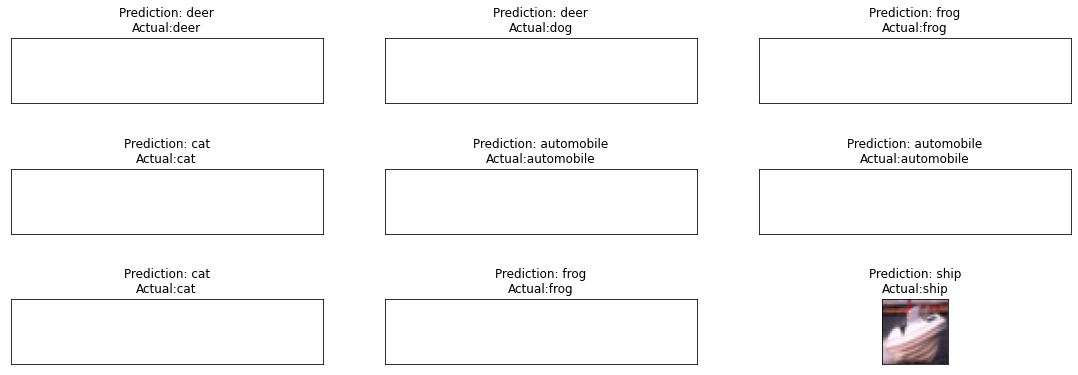

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs= axs.flatten()
for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual:{}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

#plot the image
axs[i].imshow(img)

#show the plot
plt.show()

